In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from plotnine import *

In [5]:
import datetime

In [6]:
xls = pd.ExcelFile("Case- Hospital Waste Order Data.xlsx")

In [7]:
df = pd.read_excel(xls,'Orders')

In [8]:
df.head()

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8343 entries, 0 to 8342
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Order ID                                  8343 non-null   int64         
 1   Drug ID                                   8343 non-null   int64         
 2   Start Date/time                           8343 non-null   datetime64[ns]
 3   Final Date/time                           8343 non-null   datetime64[ns]
 4   Duration (Time between doses [in hours])  8343 non-null   int64         
 5   Cancel Date/time                          7035 non-null   datetime64[ns]
 6   # of doses redispensed                    8343 non-null   int64         
 7   cancellation time decimal                 8343 non-null   object        
 8   cancellation hour rounded                 8343 non-null   object        
 9   hour of cancellation 0 to 23  

### Analyzing Data

- Calcellation analyzing

Text(0.5, 0, 'Cancellation')

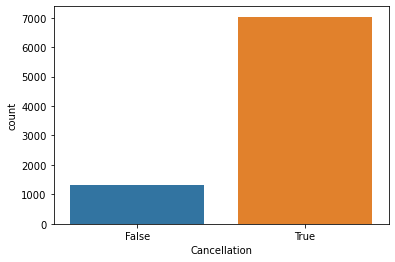

In [10]:
# The number of calellation
import warnings
warnings.filterwarnings("ignore")
sns.countplot(df['cancelled ?'])
plt.xlabel('Cancellation')

In [11]:
# Percentage of calcellation
df.groupby('cancelled ?').count()['Order ID']/8343*100

cancelled ?
False    15.677814
True     84.322186
Name: Order ID, dtype: float64

In [12]:
# Histogram of calcellation time

In [13]:
cancellation_count = df[df['hour of cancellation 0 to 23'] != 'not cancelled']['hour of cancellation 0 to 23'].value_counts()

In [14]:
cancellation_count = cancellation_count.sort_index()
cancellation_count = pd.DataFrame(cancellation_count)
cancellation_count.reset_index(inplace = True)

In [15]:
cancellation_count

,index,hour of cancellation 0 to 23
0,0,111
1,1,55
2,2,56
3,3,57
4,4,65
5,5,47
6,6,80
7,7,189
8,8,334
9,9,511


In [16]:
cancellation_count['Percentage'] = cancellation_count['hour of cancellation 0 to 23']/cancellation_count['hour of cancellation 0 to 23'].sum()*100

In [17]:
cancellation_count

,index,hour of cancellation 0 to 23,Percentage
0,0,111,1.577825
1,1,55,0.781805
2,2,56,0.796020
3,3,57,0.810235
4,4,65,0.923952
5,5,47,0.668088
6,6,80,1.137171
7,7,189,2.686567
8,8,334,4.747690
9,9,511,7.263682


<AxesSubplot:xlabel='index', ylabel='hour of cancellation 0 to 23'>

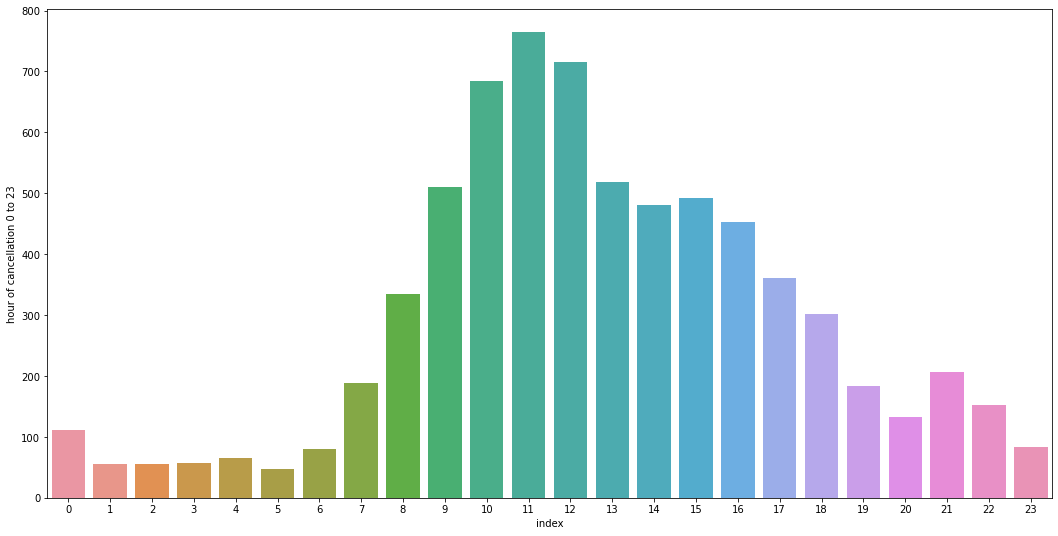

In [18]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'index', y= 'hour of cancellation 0 to 23', data = cancellation_count)

<AxesSubplot:xlabel='index', ylabel='Percentage'>

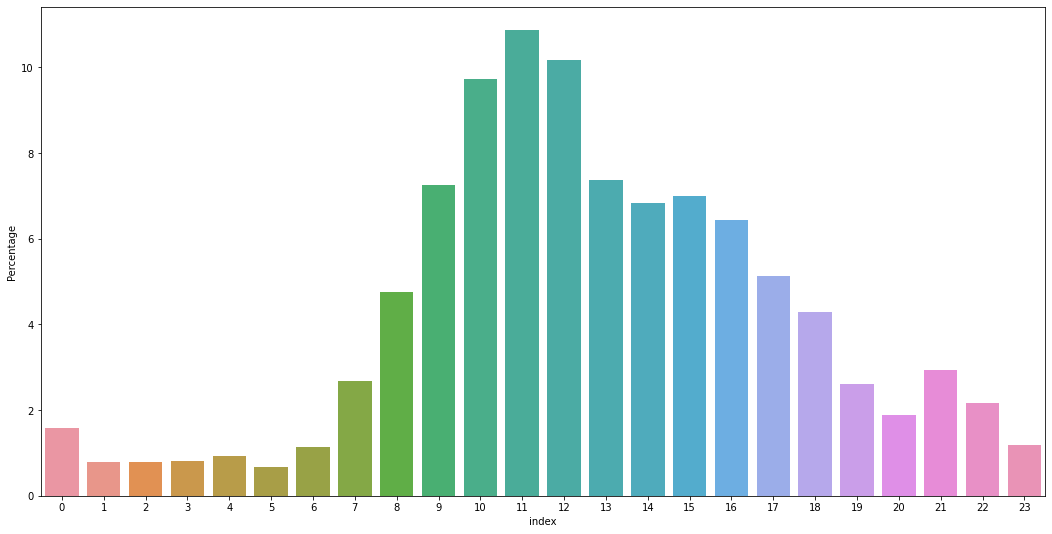

In [19]:
# The probability of cancellation by time
plt.figure(figsize = (18,9))
sns.barplot(x = 'index', y= 'Percentage', data = cancellation_count)

<AxesSubplot:xlabel='number doses per hour', ylabel='Count'>

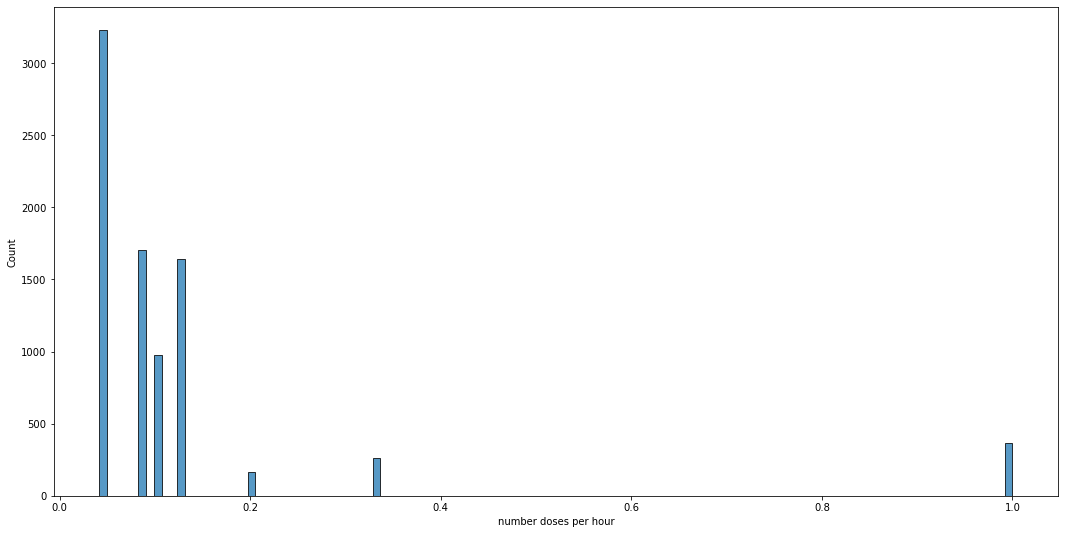

In [20]:
plt.figure(figsize = (18,9))
sns.histplot(df['number doses per hour'])

In [21]:
df['duration_start_end'] = df['Final Date/time'] - df['Start Date/time']

In [22]:
df['duration_start_calcellation'] = df['Cancel Date/time'] - df['Start Date/time']

In [23]:
df

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00.000000,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00.000000,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00.000000,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00.000000,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00.000000,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00.000000,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103
8339,8340,5,2012-12-31 12:48:54.945160,2013-01-05 08:48:18.567393,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,4 days 19:59:23.622233,NaT
8340,8341,5,2012-12-31 12:41:37.782791,2013-01-03 04:41:04.526742,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,2 days 15:59:26.743951,NaT
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00.000000,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489


<AxesSubplot:xlabel='duration_start_calcellation', ylabel='count'>

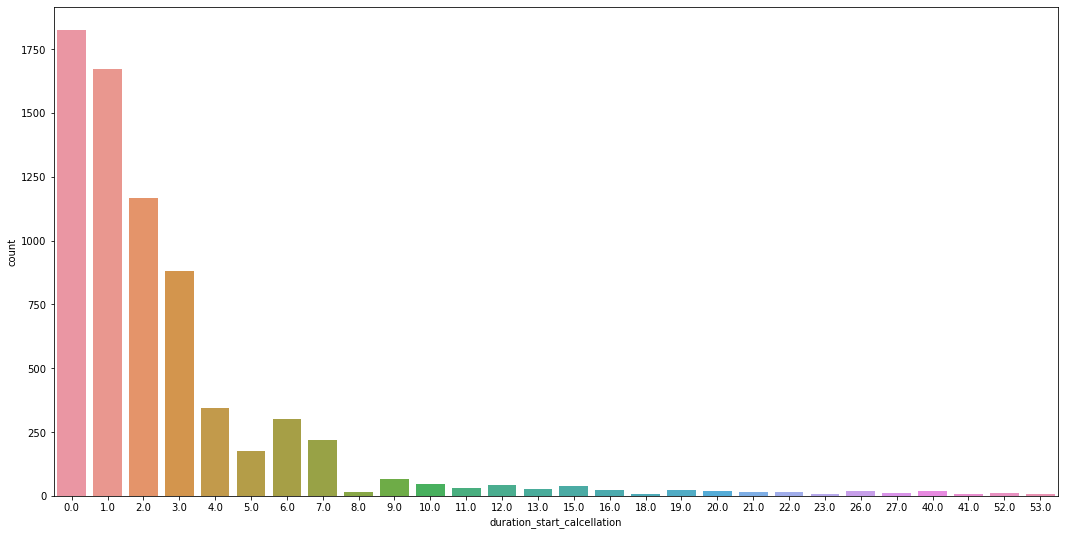

In [24]:
plt.figure(figsize = (18,9))
sns.countplot(df['duration_start_calcellation'].apply(lambda x: x.days))

<AxesSubplot:xlabel='duration_start_end', ylabel='count'>

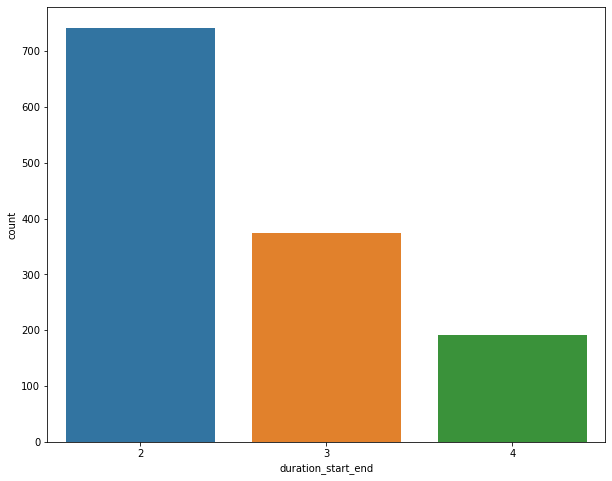

In [25]:
plt.figure(figsize = (10,8))
sns.countplot(df[df['cancelled ?'] == False]['duration_start_end'].apply(lambda x: x.days))

- The cost of cancellation 

In [26]:
df['waste cost'] = df[df['cancelled ?'] == True]['cost per hour of supply']*24

In [27]:
df['waste cost'].sum()

140541.39635619047

In [28]:
df

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00.000000,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00.000000,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00.000000,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00.000000,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00.000000,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00.000000,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920
8339,8340,5,2012-12-31 12:48:54.945160,2013-01-05 08:48:18.567393,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,4 days 19:59:23.622233,NaT,NaN
8340,8341,5,2012-12-31 12:41:37.782791,2013-01-03 04:41:04.526742,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,2 days 15:59:26.743951,NaT,NaN
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00.000000,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323


- Distribution of drug id

In [29]:
df1 = df[df['cancelled ?'] == True]

- Dataframe with only cancellation

In [30]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,0.125000,0.849292,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,0.083333,0.566194,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323


<AxesSubplot:xlabel='Drug ID', ylabel='count'>

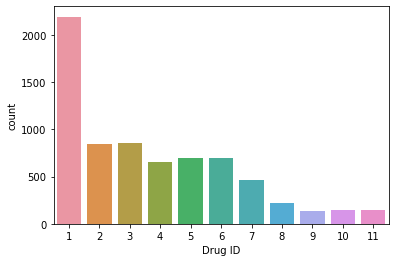

In [31]:
sns.countplot(df1['Drug ID'])

In [32]:
(df1['Drug ID'].value_counts()/df1['Drug ID'].count())*100

1     31.130064
3     12.139303
2     11.926084
5      9.879176
6      9.864961
4      9.267946
7      6.538735
8      3.070362
11     2.132196
10     2.103767
9      1.947406
Name: Drug ID, dtype: float64

In [33]:
df1['Drug Price'] = df1['cost per hour of supply']/df1['number doses per hour']
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,Drug Price
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,0.125000,0.849292,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,0.083333,0.566194,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661


In [34]:
df1['dose per day'] = 24/df1['Duration (Time between doses [in hours])']

In [35]:
df1['duration_start_cancellation_convert'] = df1['duration_start_calcellation'].apply(lambda x: x.total_seconds()/86400)

In [36]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920,1.0,1.790603
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333,3.0,0.548874
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333,3.0,0.751436
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000,1.0,4.448538
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947,8.0,5.388402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,0.125000,0.849292,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333,3.0,1.244256
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,0.083333,0.566194,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333,2.0,1.110737
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920,1.0,2.740505
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661,2.0,3.236986


In [37]:
df1['duration_start_cancellation_convert'] = df1['duration_start_cancellation_convert'].apply(lambda x: round(x))

In [38]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920,1.0,2
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333,3.0,1
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333,3.0,1
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000,1.0,4
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947,8.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,0.125000,0.849292,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333,3.0,1
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,0.083333,0.566194,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333,2.0,1
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920,1.0,3
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661,2.0,3


In [39]:
df1['cost consume'] = df1['Drug Price']*df1['dose per day']*df1['duration_start_cancellation_convert']

In [40]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert,cost consume
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,0.041667,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920,1.0,2,8.703840
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,0.125000,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333,3.0,1,20.383000
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,0.125000,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333,3.0,1,20.383000
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,0.041667,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000,1.0,4,27.032000
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,0.333333,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947,8.0,5,35.997867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,0.125000,0.849292,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333,3.0,1,20.383000
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,0.083333,0.566194,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333,2.0,1,13.588667
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,0.041667,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920,1.0,3,13.055760
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,0.083333,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661,2.0,3,104.259969


In [41]:
df1['cost consume'].sum()

532640.6040019046

In [42]:
df1['cost of redispensed'] = df1['# of doses redispensed']*df1['Drug Price']

In [43]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,...,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert,cost consume,cost of redispensed
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,...,0.181330,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920,1.0,2,8.703840,0.0
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,...,0.849292,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333,3.0,1,20.383000,0.0
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,...,0.849292,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333,3.0,1,20.383000,0.0
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,...,0.281583,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000,1.0,4,27.032000,0.0
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,...,0.299982,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947,8.0,5,35.997867,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,...,0.849292,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333,3.0,1,20.383000,0.0
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,...,0.566194,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333,2.0,1,13.588667,0.0
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,...,0.181330,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920,1.0,3,13.055760,0.0
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,...,1.448055,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661,2.0,3,104.259969,0.0


In [44]:
df1['cost of redispensed'].sum()

3778.327062857142

- Cost per hour

In [45]:
cost_perh = pd.DataFrame(df1.groupby('hour of cancellation 0 to 23').sum()['waste cost'])

In [46]:
cost_perh.reset_index(inplace = True)

In [47]:
cost_perh

,hour of cancellation 0 to 23,waste cost
0,0,2017.284868
1,1,926.696243
2,2,1189.316573
3,3,1354.130534
4,4,1163.278171
5,5,1239.885912
6,6,2169.913860
7,7,3674.806950
8,8,6620.004285
9,9,9389.345523


<AxesSubplot:xlabel='hour of cancellation 0 to 23', ylabel='waste cost'>

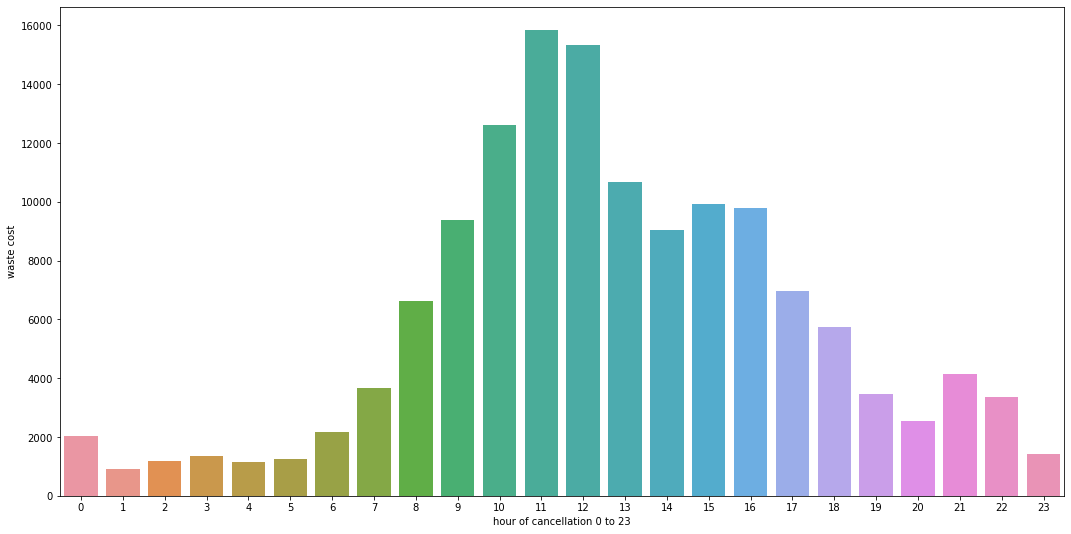

In [48]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'hour of cancellation 0 to 23', y = 'waste cost', data = cost_perh)

In [49]:
a = df1['Start Date/time'].iloc[1]

In [50]:
a.hour

4

In [51]:
df1['Time Injection'] = df1['Start Date/time'].apply(lambda x: x.hour)

In [52]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,...,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert,cost consume,cost of redispensed,Time Injection
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,...,True,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920,1.0,2,8.703840,0.0,3
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,...,True,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333,3.0,1,20.383000,0.0,4
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,...,True,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333,3.0,1,20.383000,0.0,5
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,...,True,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000,1.0,4,27.032000,0.0,7
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,...,True,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947,8.0,5,35.997867,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,...,True,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333,3.0,1,20.383000,0.0,9
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,...,True,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333,2.0,1,13.588667,0.0,11
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,...,True,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920,1.0,3,13.055760,0.0,11
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,...,True,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661,2.0,3,104.259969,0.0,14


In [53]:
df1['dose per day'] = df1['dose per day'].apply(lambda x: int(x))

In [54]:
df1['range_dose'] = df1['dose per day'].apply(lambda x: list(range(0,x)))

In [55]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,...,duration_start_end,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert,cost consume,cost of redispensed,Time Injection,range_dose
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,...,59 days 23:59:48.968465,1 days 18:58:28.091199,4.351920,4.351920,1,2,8.703840,0.0,3,[0]
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,...,59 days 23:59:48.288460,0 days 13:10:22.722299,20.383000,6.794333,3,1,20.383000,0.0,4,"[0, 1, 2]"
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,...,59 days 23:59:54.448352,0 days 18:02:04.049941,20.383000,6.794333,3,1,20.383000,0.0,5,"[0, 1, 2]"
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,...,59 days 23:59:56.691597,4 days 10:45:53.648973,6.758000,6.758000,1,4,27.032000,0.0,7,[0]
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,...,59 days 23:59:51.948773,5 days 09:19:17.924172,7.199573,0.899947,8,5,35.997867,0.0,8,"[0, 1, 2, 3, 4, 5, 6, 7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,...,59 days 23:59:40.386126,1 days 05:51:43.728097,20.383000,6.794333,3,1,20.383000,0.0,9,"[0, 1, 2]"
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,...,59 days 23:59:08.216287,1 days 02:39:27.671587,13.588667,6.794333,2,1,13.588667,0.0,11,"[0, 1]"
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,...,59 days 23:59:40.685826,2 days 17:46:19.656103,4.351920,4.351920,1,3,13.055760,0.0,11,[0]
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,...,59 days 23:59:55.910703,3 days 05:41:15.552489,34.753323,17.376661,2,3,104.259969,0.0,14,"[0, 1]"


In [56]:
cal_time = []

In [57]:
for j in list(range(0,7035)):
    for i in df1['range_dose'].iloc[j]:
        cal_time.append(df1['Time Injection'].iloc[j] + i*24/df1['dose per day'].iloc[j])

In [58]:
cal_time = pd.DataFrame(cal_time)

In [59]:
cal_time

,0
0,3.0
1,4.0
2,12.0
3,20.0
4,5.0
...,...
20884,11.0
20885,14.0
20886,26.0
20887,15.0


In [60]:
cal_time.rename(columns = {0: 'time_dose'}, inplace = True)

In [61]:
def cal(x):
    if x > 24:
        return x - 24
    else: 
        return x

In [62]:
cal_time['time_dose'] = cal_time['time_dose'].apply(lambda x: cal(x))

<AxesSubplot:xlabel='time_dose', ylabel='count'>

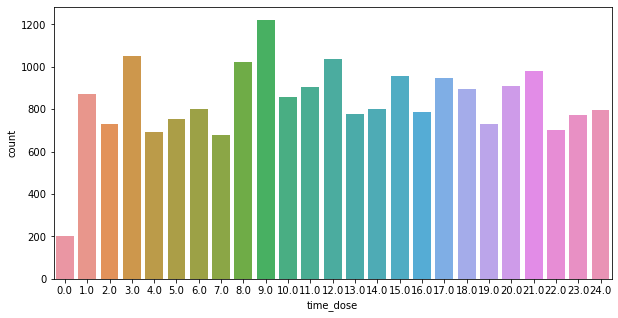

In [63]:
plt.figure(figsize = (10,5))
sns.countplot(cal_time['time_dose'])

- The time of first dose after cancellation time, assuming the start date is the first dose after cancellation

In [64]:
df1['label generation time'] = df1['Start Date/time'].apply(lambda x: x.hour - 3)

In [65]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,...,duration_start_calcellation,waste cost,Drug Price,dose per day,duration_start_cancellation_convert,cost consume,cost of redispensed,Time Injection,range_dose,label generation time
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,...,1 days 18:58:28.091199,4.351920,4.351920,1,2,8.703840,0.0,3,[0],0
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,...,0 days 13:10:22.722299,20.383000,6.794333,3,1,20.383000,0.0,4,"[0, 1, 2]",1
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,...,0 days 18:02:04.049941,20.383000,6.794333,3,1,20.383000,0.0,5,"[0, 1, 2]",2
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,...,4 days 10:45:53.648973,6.758000,6.758000,1,4,27.032000,0.0,7,[0],4
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,...,5 days 09:19:17.924172,7.199573,0.899947,8,5,35.997867,0.0,8,"[0, 1, 2, 3, 4, 5, 6, 7]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,...,1 days 05:51:43.728097,20.383000,6.794333,3,1,20.383000,0.0,9,"[0, 1, 2]",6
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,...,1 days 02:39:27.671587,13.588667,6.794333,2,1,13.588667,0.0,11,"[0, 1]",8
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,...,2 days 17:46:19.656103,4.351920,4.351920,1,3,13.055760,0.0,11,[0],8
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,...,3 days 05:41:15.552489,34.753323,17.376661,2,3,104.259969,0.0,14,"[0, 1]",11


In [66]:
df1[df1['label generation time'] > df1['hour of cancellation 0 to 23']]['Order ID'].count()/7035*100

30.87420042643923

In [67]:
df['waste cost'].sum()*0.31

43567.83287041904

In [68]:
df['# of doses redispensed'].sum()

1130

- Cost of dispense

In [69]:
(df['# of doses redispensed']*df['cost per hour of supply']/df['number doses per hour']).sum()

4324.605176190476

In [70]:
df.groupby('Drug ID')['# of doses redispensed'].sum()

Drug ID
1       0
2       0
3       0
4       2
5       2
6      18
7      68
8     137
9      11
10    434
11    458
Name: # of doses redispensed, dtype: int64

In [71]:
# Percentage
df.groupby('Drug ID')['# of doses redispensed'].sum()/1130*100

Drug ID
1      0.000000
2      0.000000
3      0.000000
4      0.176991
5      0.176991
6      1.592920
7      6.017699
8     12.123894
9      0.973451
10    38.407080
11    40.530973
Name: # of doses redispensed, dtype: float64

In [72]:
# cost of redispense
df['cost of redispensed'] = df['# of doses redispensed']*df['cost per hour of supply']/df['number doses per hour']

In [73]:
df.groupby('Drug ID')['cost of redispensed'].sum()

Drug ID
1        0.000000
2        0.000000
3        0.000000
4       34.753323
5       13.516000
6      152.145000
7     2114.753760
8      123.292693
9      312.070000
10    1116.074400
11     458.000000
Name: cost of redispensed, dtype: float64

In [74]:
# Number of drug were ordered cancellation
df1['Drug taken'] = df1['duration_start_cancellation_convert']*df1['dose per day']

In [75]:
df1

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,...,waste cost,Drug Price,dose per day,duration_start_cancellation_convert,cost consume,cost of redispensed,Time Injection,range_dose,label generation time,Drug taken
0,1,3,2012-01-01 03:55:11.031535,2012-03-01 03:55:00,24,2012-01-02 22:53:39.122734,0,22.883333,23,23,...,4.351920,4.351920,1,2,8.703840,0.0,3,[0],0,2
1,2,1,2012-01-01 04:51:11.711540,2012-03-01 04:51:00,8,2012-01-01 18:01:34.433839,0,18.016667,18,18,...,20.383000,6.794333,3,1,20.383000,0.0,4,"[0, 1, 2]",1,3
2,3,1,2012-01-01 05:48:05.551648,2012-03-01 05:48:00,8,2012-01-01 23:50:09.601589,0,23.833333,24,0,...,20.383000,6.794333,3,1,20.383000,0.0,5,"[0, 1, 2]",2,3
3,4,5,2012-01-01 07:00:03.308403,2012-03-01 07:00:00,24,2012-01-05 17:45:56.957376,0,17.750000,18,18,...,6.758000,6.758000,1,4,27.032000,0.0,7,[0],4,4
4,5,8,2012-01-01 08:13:08.051227,2012-03-01 08:13:00,3,2012-01-06 17:32:25.975399,0,17.533333,18,18,...,7.199573,0.899947,8,5,35.997867,0.0,8,"[0, 1, 2, 3, 4, 5, 6, 7]",5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336,8337,1,2012-12-31 09:14:19.613874,2013-03-01 09:14:00,8,2013-01-01 15:06:03.341971,0,15.100000,15,15,...,20.383000,6.794333,3,1,20.383000,0.0,9,"[0, 1, 2]",6,3
8337,8338,1,2012-12-31 11:03:51.783713,2013-03-01 11:03:00,12,2013-01-01 13:43:19.455300,0,13.716667,14,14,...,13.588667,6.794333,2,1,13.588667,0.0,11,"[0, 1]",8,2
8338,8339,3,2012-12-31 11:02:19.314174,2013-03-01 11:02:00,24,2013-01-03 04:48:38.970277,0,4.800000,5,5,...,4.351920,4.351920,1,3,13.055760,0.0,11,[0],8,3
8341,8342,4,2012-12-31 14:02:04.089297,2013-03-01 14:02:00,12,2013-01-03 19:43:19.641786,0,19.716667,20,20,...,34.753323,17.376661,2,3,104.259969,0.0,14,"[0, 1]",11,6


In [76]:
# Without Cancellation
df2 = df[df['cancelled ?'] == False]

In [77]:
df2

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,cost of redispensed
5,6,7,2012-01-01 08:11:28.090212,2012-01-04 01:11:10.716951,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,1.295805,False,2 days 16:59:42.626739,NaT,NaN,0.0
17,18,10,2012-01-01 17:32:17.474043,2012-01-05 17:32:00.000000,1,NaT,0,not cancelled,not cancelled,not cancelled,1.000000,2.571600,False,3 days 23:59:42.525957,NaT,NaN,0.0
22,23,1,2012-01-01 18:29:31.326864,2012-01-04 06:28:54.404665,12,NaT,0,not cancelled,not cancelled,not cancelled,0.083333,0.566194,False,2 days 11:59:23.077801,NaT,NaN,0.0
27,28,2,2012-01-01 23:15:53.618923,2012-01-04 09:15:03.076717,10,NaT,0,not cancelled,not cancelled,not cancelled,0.100000,0.849600,False,2 days 09:59:09.457794,NaT,NaN,0.0
30,31,7,2012-01-02 06:19:39.567335,2012-01-05 04:18:45.447872,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,1.295805,False,2 days 21:59:05.880537,NaT,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,8302,1,2012-12-29 18:23:50.638978,2013-01-01 14:23:36.976295,8,NaT,0,not cancelled,not cancelled,not cancelled,0.125000,0.849292,False,2 days 19:59:46.337317,NaT,NaN,0.0
8303,8304,1,2012-12-29 20:11:40.975976,2013-01-02 15:11:16.741626,12,NaT,0,not cancelled,not cancelled,not cancelled,0.083333,0.566194,False,3 days 18:59:35.765650,NaT,NaN,0.0
8321,8322,1,2012-12-30 16:04:34.360201,2013-01-02 13:03:38.379480,8,NaT,0,not cancelled,not cancelled,not cancelled,0.125000,0.849292,False,2 days 20:59:04.019279,NaT,NaN,0.0
8339,8340,5,2012-12-31 12:48:54.945160,2013-01-05 08:48:18.567393,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,4 days 19:59:23.622233,NaT,NaN,0.0


In [78]:
df2['dose per day'] = 24/df2['Duration (Time between doses [in hours])']

In [79]:
df2

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,cost of redispensed,dose per day
5,6,7,2012-01-01 08:11:28.090212,2012-01-04 01:11:10.716951,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,1.295805,False,2 days 16:59:42.626739,NaT,NaN,0.0,1.0
17,18,10,2012-01-01 17:32:17.474043,2012-01-05 17:32:00.000000,1,NaT,0,not cancelled,not cancelled,not cancelled,1.000000,2.571600,False,3 days 23:59:42.525957,NaT,NaN,0.0,24.0
22,23,1,2012-01-01 18:29:31.326864,2012-01-04 06:28:54.404665,12,NaT,0,not cancelled,not cancelled,not cancelled,0.083333,0.566194,False,2 days 11:59:23.077801,NaT,NaN,0.0,2.0
27,28,2,2012-01-01 23:15:53.618923,2012-01-04 09:15:03.076717,10,NaT,0,not cancelled,not cancelled,not cancelled,0.100000,0.849600,False,2 days 09:59:09.457794,NaT,NaN,0.0,2.4
30,31,7,2012-01-02 06:19:39.567335,2012-01-05 04:18:45.447872,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,1.295805,False,2 days 21:59:05.880537,NaT,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,8302,1,2012-12-29 18:23:50.638978,2013-01-01 14:23:36.976295,8,NaT,0,not cancelled,not cancelled,not cancelled,0.125000,0.849292,False,2 days 19:59:46.337317,NaT,NaN,0.0,3.0
8303,8304,1,2012-12-29 20:11:40.975976,2013-01-02 15:11:16.741626,12,NaT,0,not cancelled,not cancelled,not cancelled,0.083333,0.566194,False,3 days 18:59:35.765650,NaT,NaN,0.0,2.0
8321,8322,1,2012-12-30 16:04:34.360201,2013-01-02 13:03:38.379480,8,NaT,0,not cancelled,not cancelled,not cancelled,0.125000,0.849292,False,2 days 20:59:04.019279,NaT,NaN,0.0,3.0
8339,8340,5,2012-12-31 12:48:54.945160,2013-01-05 08:48:18.567393,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,4 days 19:59:23.622233,NaT,NaN,0.0,1.0


In [80]:
df2['duration_start_end_convert'] = df2['duration_start_end'].apply(lambda x: round(x.total_seconds()/86400))

In [81]:
df2

,Order ID,Drug ID,Start Date/time,Final Date/time,Duration (Time between doses [in hours]),Cancel Date/time,# of doses redispensed,cancellation time decimal,cancellation hour rounded,hour of cancellation 0 to 23,number doses per hour,cost per hour of supply,cancelled ?,duration_start_end,duration_start_calcellation,waste cost,cost of redispensed,dose per day,duration_start_end_convert
5,6,7,2012-01-01 08:11:28.090212,2012-01-04 01:11:10.716951,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,1.295805,False,2 days 16:59:42.626739,NaT,NaN,0.0,1.0,3
17,18,10,2012-01-01 17:32:17.474043,2012-01-05 17:32:00.000000,1,NaT,0,not cancelled,not cancelled,not cancelled,1.000000,2.571600,False,3 days 23:59:42.525957,NaT,NaN,0.0,24.0,4
22,23,1,2012-01-01 18:29:31.326864,2012-01-04 06:28:54.404665,12,NaT,0,not cancelled,not cancelled,not cancelled,0.083333,0.566194,False,2 days 11:59:23.077801,NaT,NaN,0.0,2.0,2
27,28,2,2012-01-01 23:15:53.618923,2012-01-04 09:15:03.076717,10,NaT,0,not cancelled,not cancelled,not cancelled,0.100000,0.849600,False,2 days 09:59:09.457794,NaT,NaN,0.0,2.4,2
30,31,7,2012-01-02 06:19:39.567335,2012-01-05 04:18:45.447872,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,1.295805,False,2 days 21:59:05.880537,NaT,NaN,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8301,8302,1,2012-12-29 18:23:50.638978,2013-01-01 14:23:36.976295,8,NaT,0,not cancelled,not cancelled,not cancelled,0.125000,0.849292,False,2 days 19:59:46.337317,NaT,NaN,0.0,3.0,3
8303,8304,1,2012-12-29 20:11:40.975976,2013-01-02 15:11:16.741626,12,NaT,0,not cancelled,not cancelled,not cancelled,0.083333,0.566194,False,3 days 18:59:35.765650,NaT,NaN,0.0,2.0,4
8321,8322,1,2012-12-30 16:04:34.360201,2013-01-02 13:03:38.379480,8,NaT,0,not cancelled,not cancelled,not cancelled,0.125000,0.849292,False,2 days 20:59:04.019279,NaT,NaN,0.0,3.0,3
8339,8340,5,2012-12-31 12:48:54.945160,2013-01-05 08:48:18.567393,24,NaT,0,not cancelled,not cancelled,not cancelled,0.041667,0.281583,False,4 days 19:59:23.622233,NaT,NaN,0.0,1.0,5


In [97]:
# Probability of cancellation by each drug ID
df[df['cancelled ?'] == True]['Drug ID'].value_counts()

1     2190
3      854
2      839
5      695
6      694
4      652
7      460
8      216
11     150
10     148
9      137
Name: Drug ID, dtype: int64

In [92]:
df['Drug ID'].value_counts()/df['Drug ID'].count()

1     0.308762
3     0.118063
2     0.117104
6     0.100204
5     0.098166
4     0.092293
7     0.070838
8     0.031404
11    0.022414
10    0.021335
9     0.019417
Name: Drug ID, dtype: float64

In [90]:
# The probability of cancellation by start date
df['duration_start_calcellation'].apply(lambda x: x.days).value_counts()

0.0     1825
1.0     1672
2.0     1167
3.0      880
4.0      345
6.0      301
7.0      220
5.0      174
9.0       66
10.0      46
12.0      44
15.0      37
11.0      30
13.0      28
16.0      25
19.0      24
40.0      19
26.0      19
20.0      18
22.0      16
8.0       15
21.0      14
27.0      10
52.0      10
18.0       9
23.0       7
53.0       7
41.0       7
Name: duration_start_calcellation, dtype: int64